In [1]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: # pyqula not installed
        print("pyqula needs to be installed, installing it")
        import subprocess ; subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade","pyqula"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'coolwarm'


import numpy as np

# Advanced Quantum Materials, session 6: Superconductivity and Majorana Physics
In this session we will address several different examples involving superconductivity
### Contents
- Impact of superconductivity in an electronic structure
- Superconductivity driven by interactions
- Topological superconductivity
- Impact of spin-orbit coupling in superconductivity
- Artificial topological superconductivity

### Learning outcomes
- Understand which interactions promote superconductivity, and how the electronic structure gets modified
- Understand which perturbations are detrimental to superconductivity
- Understand how unconventional superconductors can be engineered 

### How the exercises are organized
- (Remider): This are introductory exercises. You can skip them if you feel comfortable with basics of the topic
- (Exercise): Conventional exercise
- Quiz: short questions to answer, for Exercise or Reminder

### It is not necessary to complete all the exercises, you can just focus on those that sound most interesting for you.

## (Reminder): Nambu electronic structure without superconductivity
First, let us see how the electronic structuer is represented in the Nambu basis

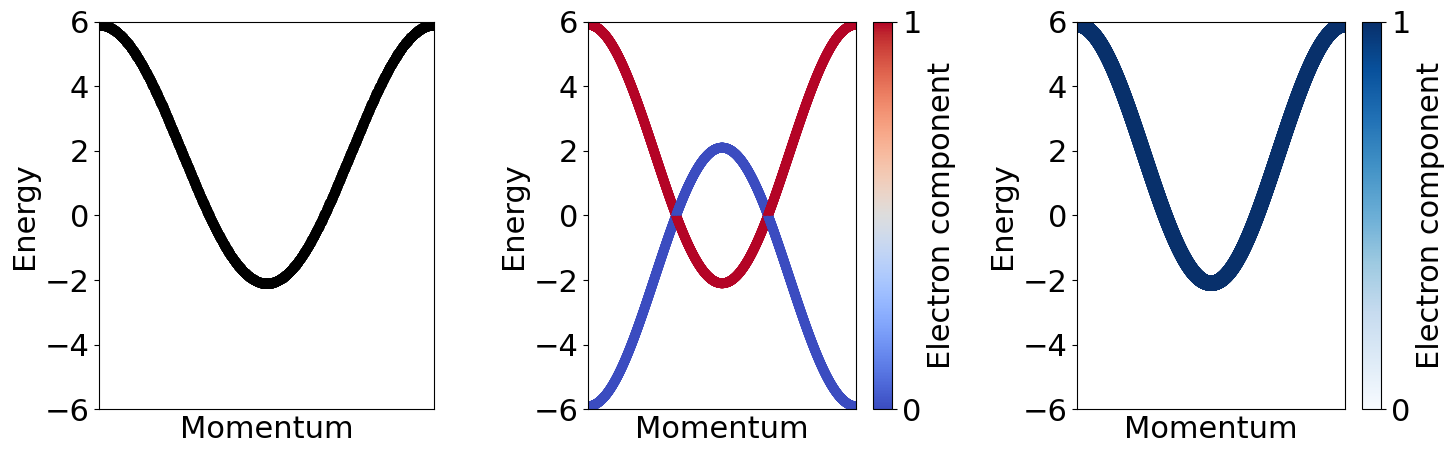

In [2]:
from pyqula import geometry
# as a warm up, let us look at how the bands look like if we added a Nambu spinor
# first, let us see how the band structure looks like
g = geometry.square_lattice() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.set_filling(0.2,nk=20) # set filling

fig = plt.figure(figsize=(15,5))

# first without Nambu spinor
plt.subplot(1,3,1)
(k,e) = h.get_bands(nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([min(k),max(k)]) ; plt.ylim([-6,6])


# now with a Nambu spinor
plt.subplot(1,3,2)
h.setup_nambu_spinor() # setup the nambu spinor
(k,e,c) = h.get_bands(operator="electron",nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot
plt.colorbar(label="Electron component",ticks=[0.,1.]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([-6,6])

plt.subplot(1,3,3)
plt.scatter(k,e,c=c,s=100*c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy")
plt.colorbar(label="Electron component",ticks=[0.,1.]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([-6,6]) 
plt.xticks([])

plt.tight_layout()

### Quiz
- Discuss how the bands with a Nambu spinor can be understood in terms of the bands without a Nambu spinor

## (Reminder): Nambu electronic structure with superconductivity
Now, let us see the electronic structuer in the Nambu basis, in the presence of superconductivity

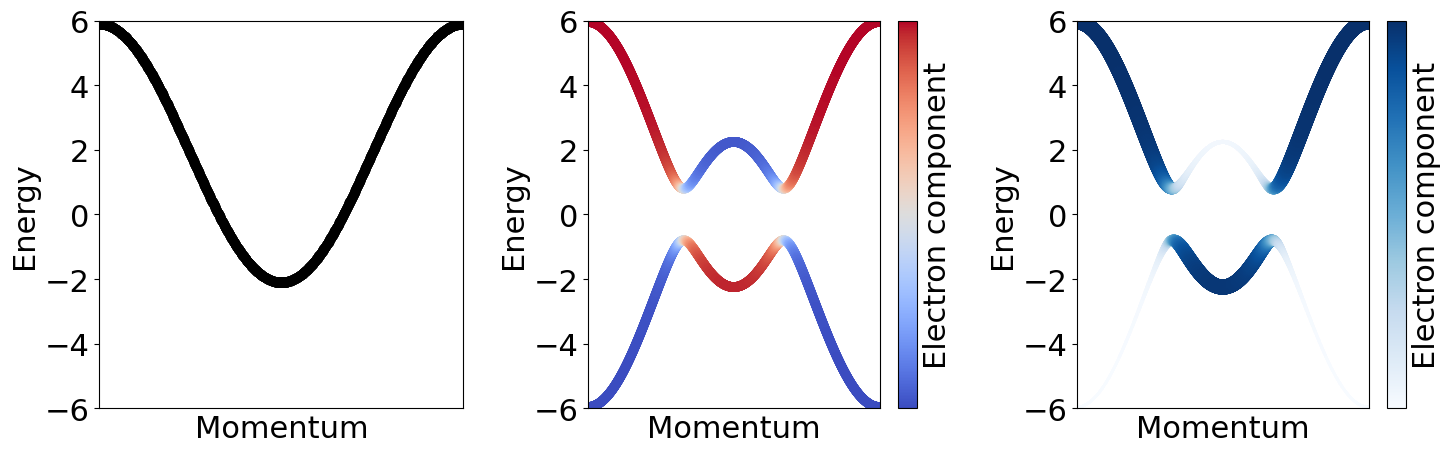

In [3]:
from pyqula import geometry
# as a warm up, let us look at how the bands look like if we added a Nambu spinor
# first, let us see how the band structure looks like
g = geometry.square_lattice() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.set_filling(0.2,nk=20) # set filling

fig = plt.figure(figsize=(15,5))

# first without Nambu spinor
plt.subplot(1,3,1)
(k,e) = h.get_bands(nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([min(k),max(k)]) ; plt.ylim([-6,6])


# now with a Nambu spinor
plt.subplot(1,3,2)
h.setup_nambu_spinor() # setup the nambu spinor
h.add_swave(0.8) # add superconductivity
(k,e,c) = h.get_bands(operator="electron",nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot
plt.colorbar(label="Electron component",ticks=[0.,1.]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([-6,6])

plt.subplot(1,3,3)
plt.scatter(k,e,c=c,s=100*c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy")
plt.colorbar(label="Electron component",ticks=[0.,1.]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([-6,6])
plt.xticks([])

plt.tight_layout()

### Quiz
- Change the value of the superconducting order (add_swave), what happens to the gap?
- Discuss why a gap opens when you add superconductivity

## (Exercise): Superconductivity, full spectral function and electron spectral function
Here we will look at the relationship between the Nambu band structure, the full BdG spectral function, and the electron spectral function

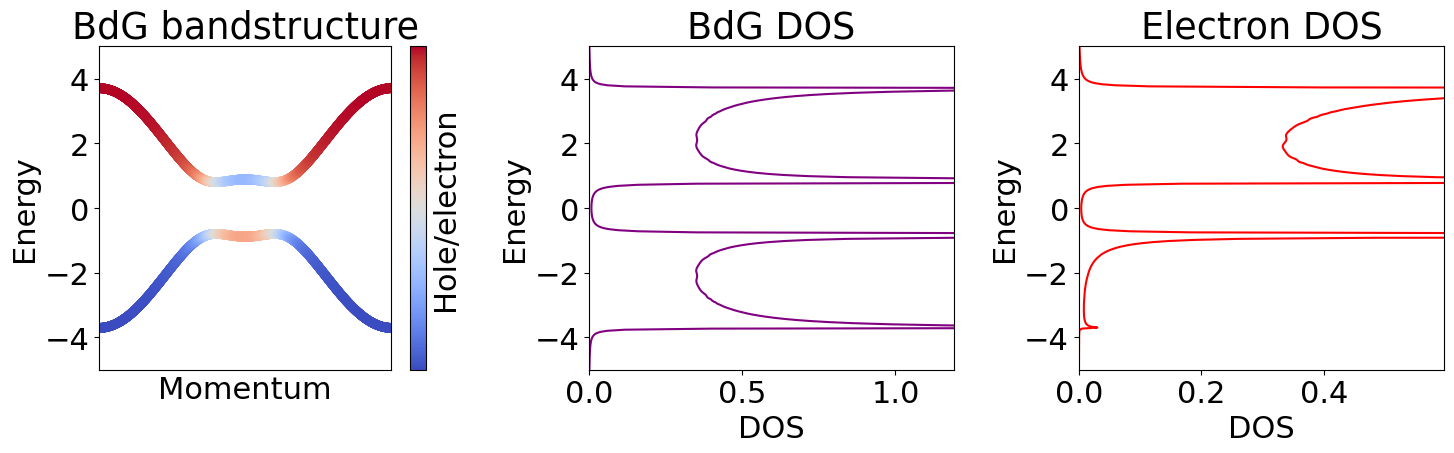

In [4]:
from pyqula import geometry
# as a warm up, let us look at how the bands look like if we added a Nambu spinor
# first, let us see how the band structure looks like
g = geometry.chain() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
filling = 0.2 # filling of the system
h.set_filling(filling,nk=20) # set filling
h.add_swave(0.8) # add superconductivity

fig = plt.figure(figsize=(15,5))
es = np.linspace(-5.0,5.0,300) # energies for the DOS
delta = 1e-2 # energy smearing

# compute BdG bands
plt.subplot(1,3,1)
plt.title("BdG bandstructure")
(k,e,c) = h.get_bands(operator="electron",nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot
plt.colorbar(label="Hole/electron",ticks=[0.,1.]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([min(es),max(es)])


plt.subplot(1,3,2)
plt.title("BdG DOS")
e1,d1 = h.get_dos(energies=es,delta=delta,nk=1000)
plt.plot(d1,e1,c="purple")
plt.xlabel("DOS") ; plt.ylabel("Energy")
plt.xlim([0.,3*np.mean(d1)]) ; plt.ylim([min(es),max(es)])

plt.subplot(1,3,3)
plt.title("Electron DOS")
e2,d2 = h.get_dos(energies=es,operator="electron",delta=delta,nk=1000)
plt.plot(d2,e2,c="red")
plt.xlabel("DOS") ; plt.ylabel("Energy")
plt.xlim([0.,3*np.mean(d2)]) ; plt.ylim([min(es),max(es)])


plt.tight_layout()

### Quiz
- Why are the full BdG DOS and the electron DOS different?
- Change the filling of the system, how do the DOS change?
- Remove superconductivity, how are the DOS? Which one is the experimentally observable one?

## (Exercise): The impact of superconductivity in an electronic structure
Let us first show how a superconducting order affects an electronic structure. For this, let us change the chemical potential of a lattice, and include spin-singlet superconductivity in the different cases

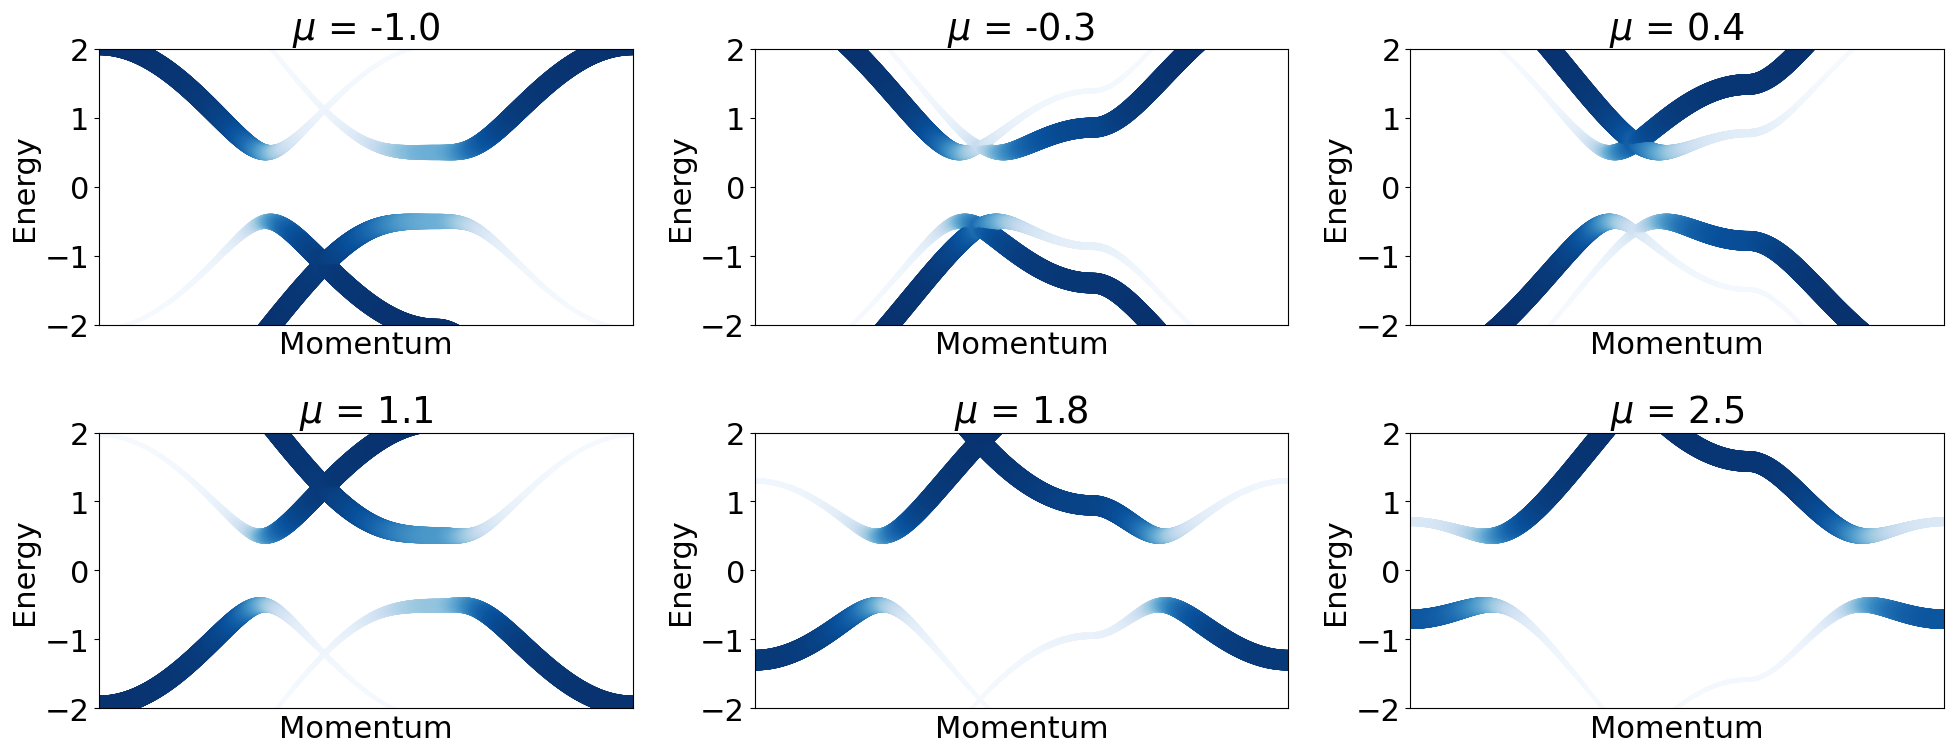

In [5]:
from pyqula import geometry
mus = np.linspace(-1.,2.5,6) # chemical potentials
g = geometry.honeycomb_lattice() # take a triangular lattice
iw = 1 # counter
delta = 0.5 # value of the superconducting order
for mu in mus: # loop over local potentials
    h = g.get_hamiltonian() # generate Hamiltonian
    h.add_onsite(mu) # shift chemical potential
    h.add_swave(delta) # add superconductivity 
    plt.subplot(2,len(mus)//2,iw) 
    iw +=1 ; plt.title("$\mu$ = "+str(np.round(mu,3)))
    (k,e,c) = h.get_bands(operator="electron",kpath=["G","K","M","G"]) # compute band structure
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xlim([min(k),max(k)])
    plt.xticks([]) ; plt.ylim([-2.,2.]) # plot
plt.tight_layout() # adjust

### Quiz
- Switch off the superconducting order. Do you still see a gap at the different chemical potentials?
- Does the gap depend on the chemical potential for finite superconducting order?
- Replace the honeycomb lattice by any other type of lattice. Do you still see a gap opening for different chemical potentials?

## (Exercise): s-wave superconductivity driven by attractive interactions
First, we will show how a superconducting state appears due to attractive interactions

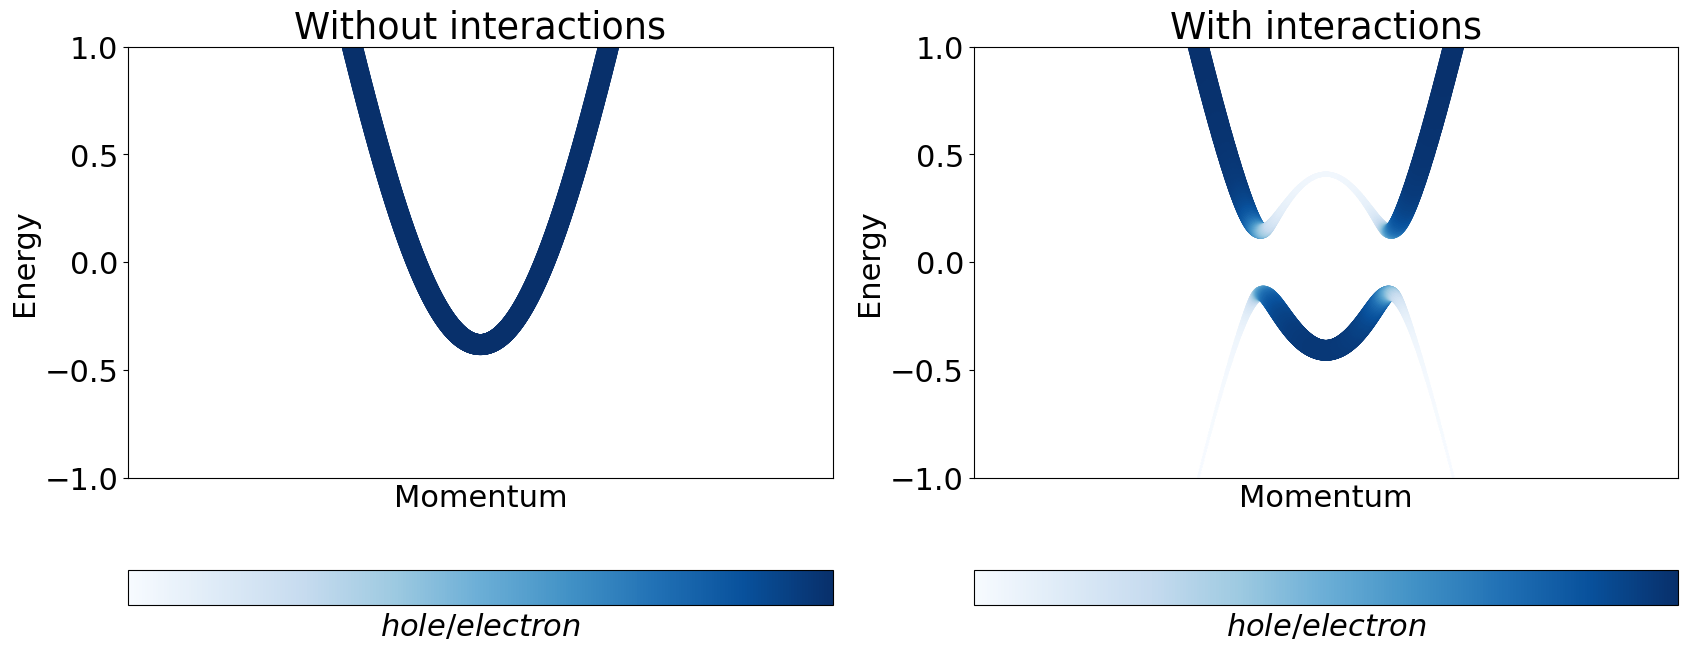

In [6]:
from pyqula import geometry
# now, let us include attractive interactions at the mean-field level
g = geometry.chain() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.setup_nambu_spinor() # setup the nambu spinor

def plot_case(hscf):
    (k,e,c) = hscf.get_bands(operator="electron",nk=800) # compute band structure
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-1,1]) ; plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")

# first, let us see how the band structure looks like without interactions
plt.subplot(1,2,1) ; plt.title("Without interactions")
filling = 0.2 # set the filling
h.set_filling(filling)
plot_case(h)

# now, let us see how the band structure looks like with interactions
hscf = h.get_mean_field_hamiltonian(U=-1.0,filling=filling,nk=10,mix=0.9,mf="swave")
plt.subplot(1,2,2) ; plt.title("With interactions")
plot_case(hscf)



### Quiz
- Identify the superconducting gap that appear due to interactions
- Increase the value of the attractive interactions. What happens to the superconducting gap?

## (Exercise): Dependence on the strength of the attractive interaction
Let us now see how the superconducting order depends on teh strength of the interaction

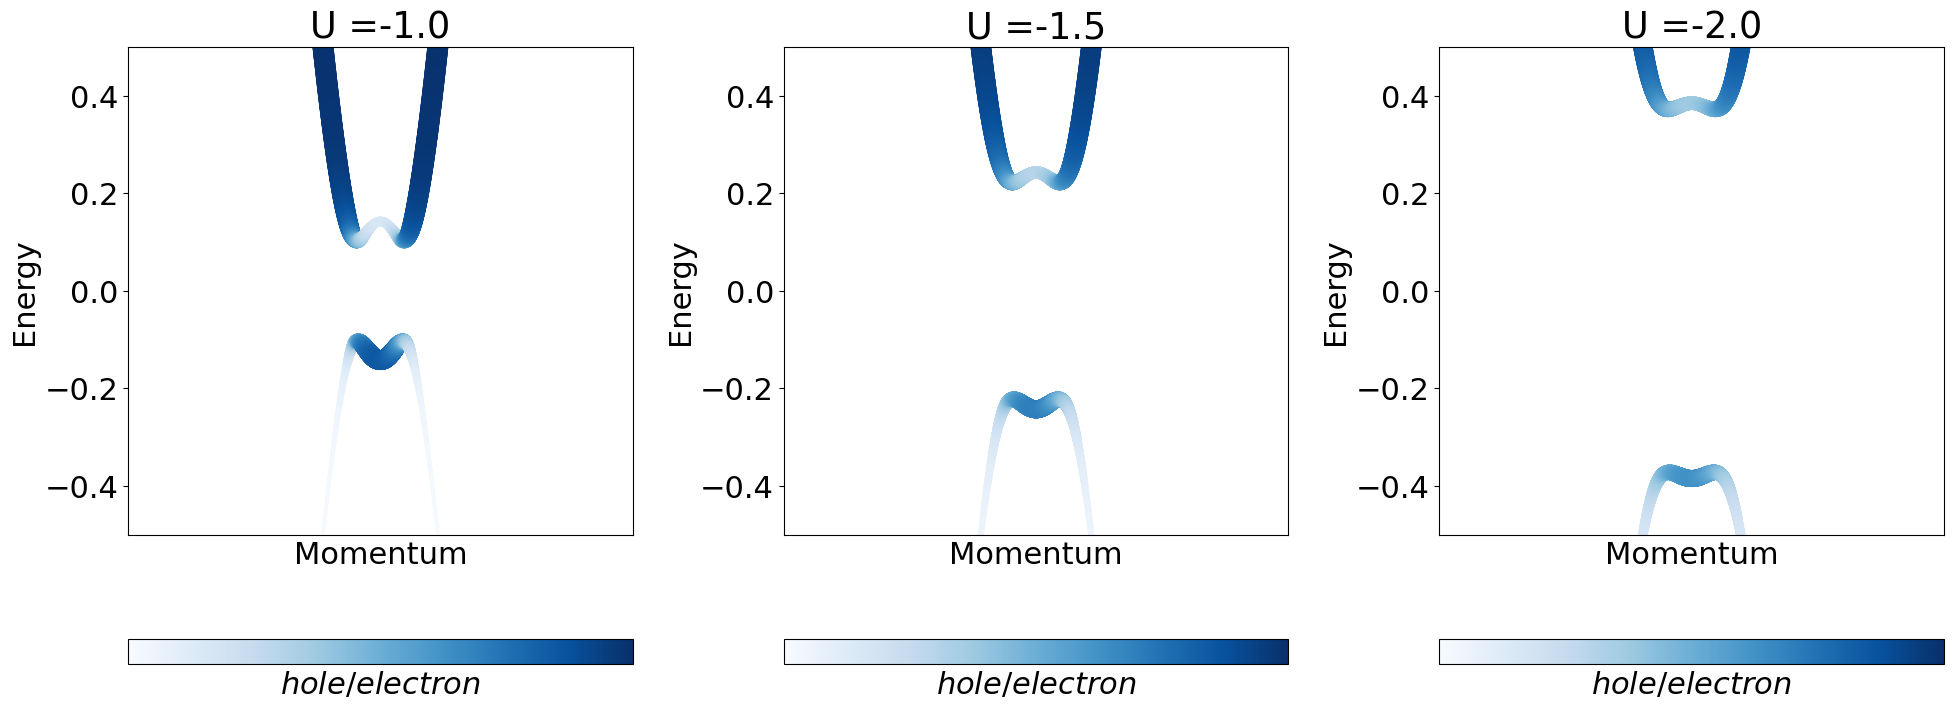

In [7]:
from pyqula import geometry
# We now compare the band structure for different interaction strength
g = geometry.chain() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.setup_nambu_spinor() # setup the nambu spinor
Us = [-1.0,-1.5,-2.0]
iu = 0
#h.add_exchange([0.,0.,0.5]) # to add a Zeeman field
for U in Us: # loop over interaction strength
    hscf = h.get_mean_field_hamiltonian(U=U,filling=0.1,nk=100,mix=0.5,mf="swave")
    # first, let us see how the band structure looks like
    (k,e,c) = hscf.get_bands(operator="electron",nk=2000) # compute band structure
    plt.subplot(1,len(Us),iu+1) ; iu += 1
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.title("U ="+str(U)) 
    plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")
    
plt.tight_layout()

### Quiz
- Perform the selfconsistent calculation above including an external Zeeman field. Does the superconducting gap become bigger or smaller? This effect is known as paramagnetic depairing.

## (Exercise): Unconventional singlet superconducting orders
In the example above we considered the simplest superconducting case, an s-wave superconductor. Let us now address other types of superconducting order parameters

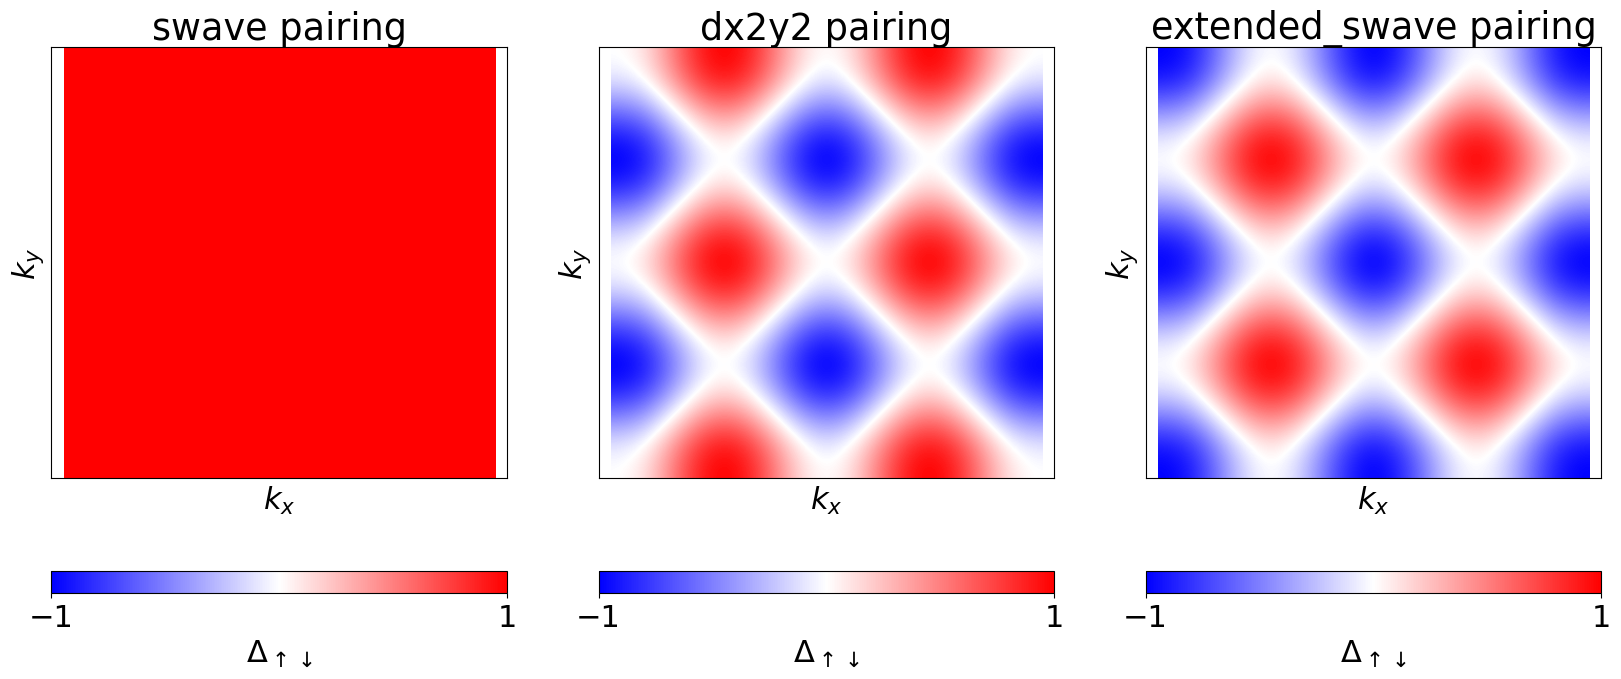

In [8]:
from pyqula import geometry
g = geometry.square_lattice() # generate a square lattice

# define a function to return pairing in reciprocal space
def deltak(mode): # function to extract the pairing from a geometry
    h = g.get_hamiltonian() # generate Hamiltonian
    h.add_pairing(mode=mode,delta=0.2) # add pairing
    nk = 20 # number of k-points
    ks = np.linspace(-1.,1.,nk)
    ds = [] # empty list
    for kx in ks:
        for ky in ks: ds.append(h.get_hk_gen()([kx,ky])[0,2]) # extract pairing from the Hamiltonian matrix
    ni = np.random.randint(len(ds)) ; ds = ds/ds[ni] ; ds = ds.real # make the order parameter real
    ds = ds.reshape((nk,nk)) ; ds = ds.real/np.max(np.abs(ds)) # normalize
    plt.imshow(ds,vmin=-1,vmax=1.,interpolation='bicubic',cmap="bwr") ; plt.axis("equal")  
    plt.colorbar(ticks=[-1,1],label="$\Delta_{\\uparrow\\downarrow}$",orientation = 'horizontal')
    plt.title(mode+" pairing") ; plt.xlabel("$k_x$") ; plt.ylabel("$k_y$") ; plt.xticks([]) ; plt.yticks([])

ps = ["swave","dx2y2","extended_swave"]
ip = 1
for p in ps: # plot all the pairings
    plt.subplot(1,len(ps),ip) ; ip+=1 
    deltak(p)


### Quiz
- Discuss how you can see from the plots above that those pairings correspond to a spin singlet state from symmetry considerations
- (Advanced) Does the extended s-wave order lead to a fully gapped superconductor?

## (Reminder): The impact of a spin splitting in an electronic structure
Let us first recall what having a spin splitting looks like

(-4.0, 4.0)

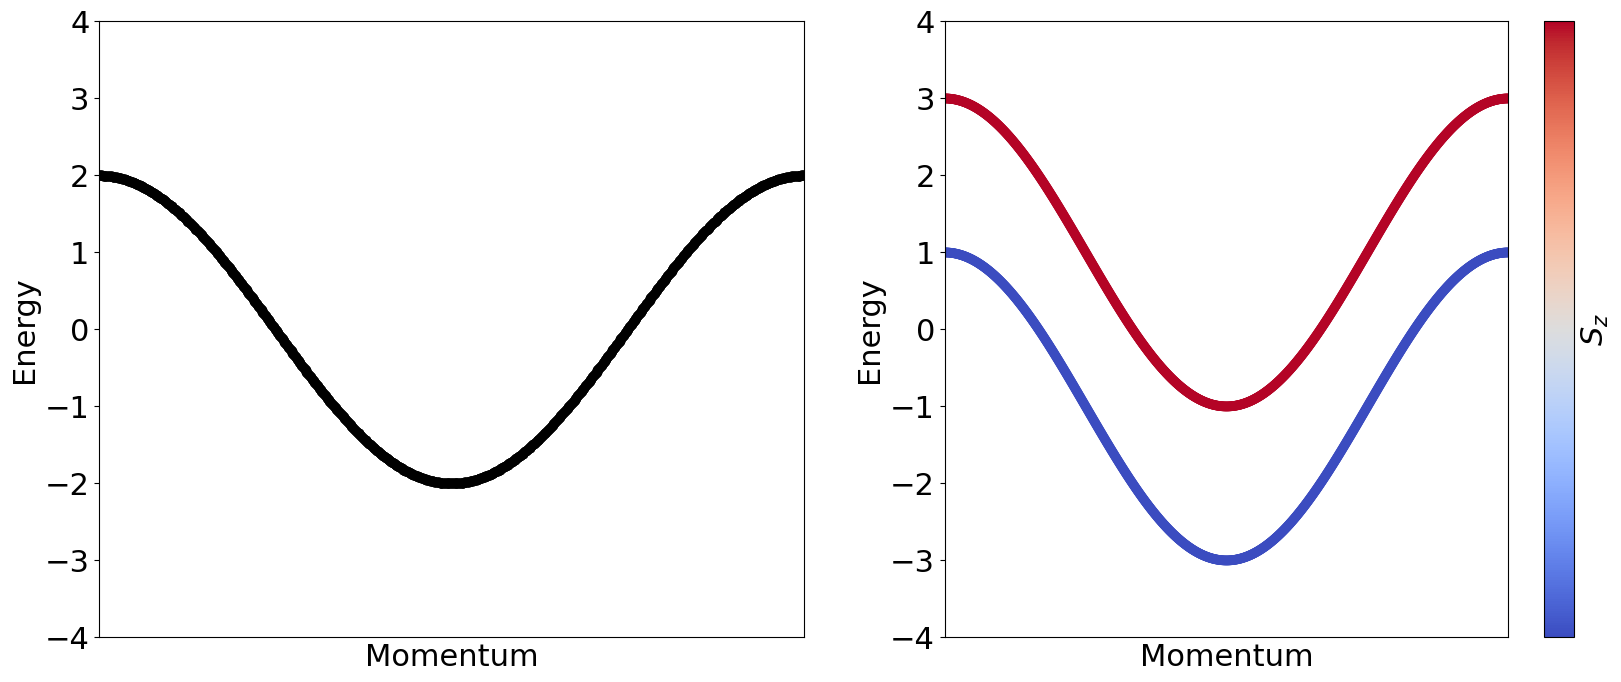

In [9]:
from pyqula import geometry
g = geometry.chain() # generate a triangular lattice
h = g.get_hamiltonian() # generate the Hamiltonian

# first without exchange
plt.subplot(1,2,1)
(k,e) = h.get_bands(nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([min(k),max(k)]) ; plt.ylim([-4,4])


# now with a Nambu spinor
plt.subplot(1,2,2)
h.add_exchange([0.,0.,1.0]) # setup the nambu spinor
(k,e,c) = h.get_bands(operator="sz",nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot
plt.colorbar(label="$S_z$",ticks=[]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([-4,4])


### Quiz
- Change the value of the exchange in the Hamiltonian, what happens to the splitting between up and down spins?
- Does the band structure on the right break time-reversal symmetry? How can you see that?

## (Exercise): A spin triplet superconductor
We are now going to compute a spin triplet superconductor, and show that it has edge modes

(-3.0, 3.0)

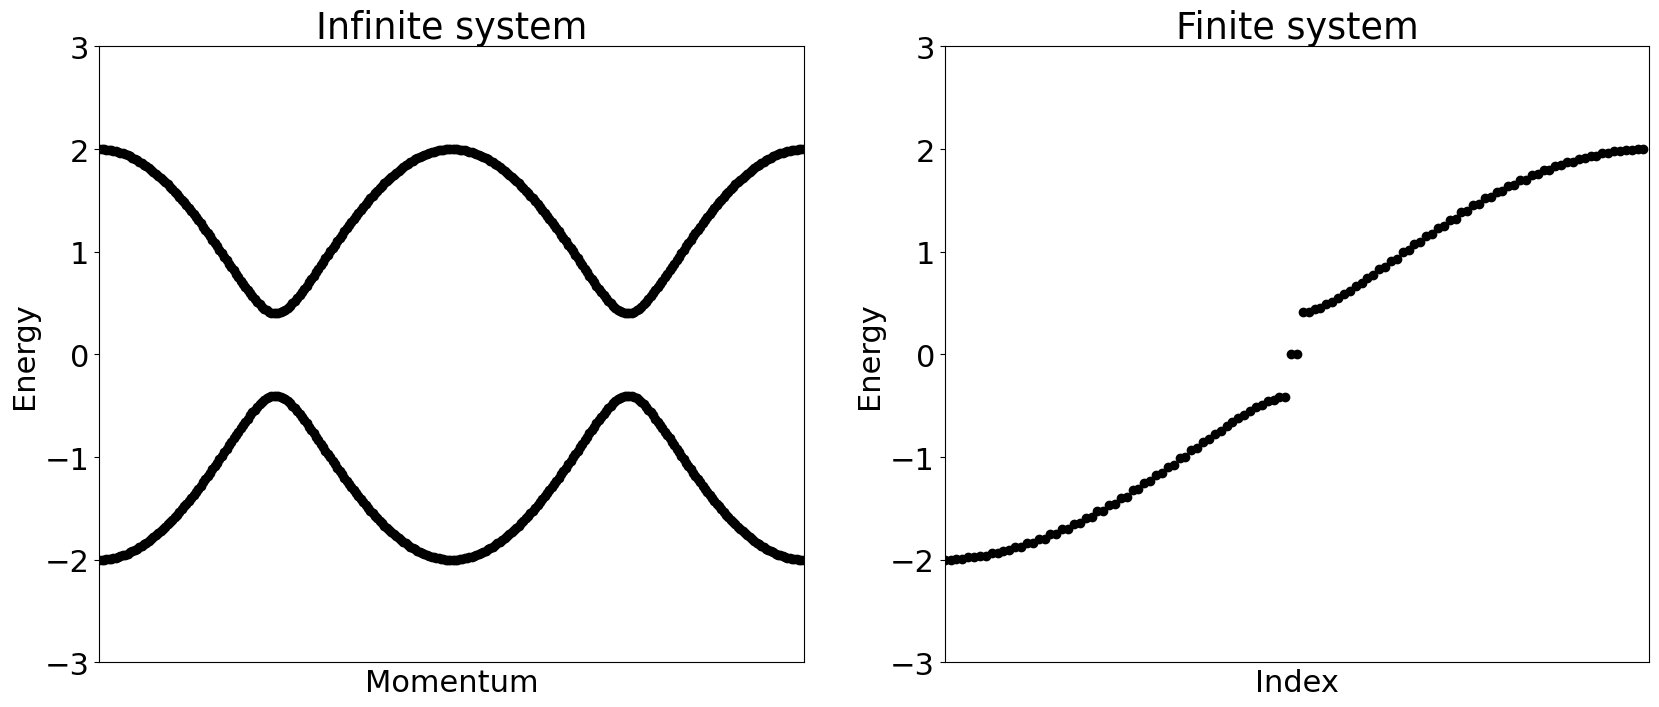

In [10]:
from pyqula import geometry

def get_kitaev_model(g): # transform a geometry into the Kitaev model
    h = g.get_hamiltonian() # generate a Hamiltonian
    h.add_onsite(4.0) ; h.add_exchange([0.,0.,4.]) # spinless electron gas
    delta = 0.2 # strength of the superconducting order
    h.add_pairing(mode="pwave",delta=delta,d=[1.,0.,0.]) # add p-wave SC order
    return h

# first the bulk
gb = geometry.chain()
plt.subplot(1,2,1)
plt.title("Infinite system")
hb = get_kitaev_model(gb) # generate kitaev model
k,e = hb.get_bands(nk=300)
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([min(k),max(k)]) ; plt.ylim([-3,3])

# now the finite system
plt.subplot(1,2,2)
plt.title("Finite system")
L = 60 # length of the finite system
gf = gb.get_supercell(L) ; gf.dimensionality = 0 # make a finite system
hf = get_kitaev_model(gf) # generate kitaev model
ind,e = hf.get_bands()
e = e[np.abs(e)<3.] # only low energy
plt.scatter(range(len(e)),e,c="black") ; plt.xlabel("Index") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.xlim([0,len(e)]) 
plt.ylim([-3,3])



### Quiz
- Change the value of the superconducting order "delta", how does the electronic structure change?
- Why are there zero modes for a finite system but not for an infinite system?
- Decrease the length of the finite system L, what happens to the zero modes?

## (Exercise): Majorana modes in a spin triplet superconductor
Let us not analyze the zero modes of a topological superconductor

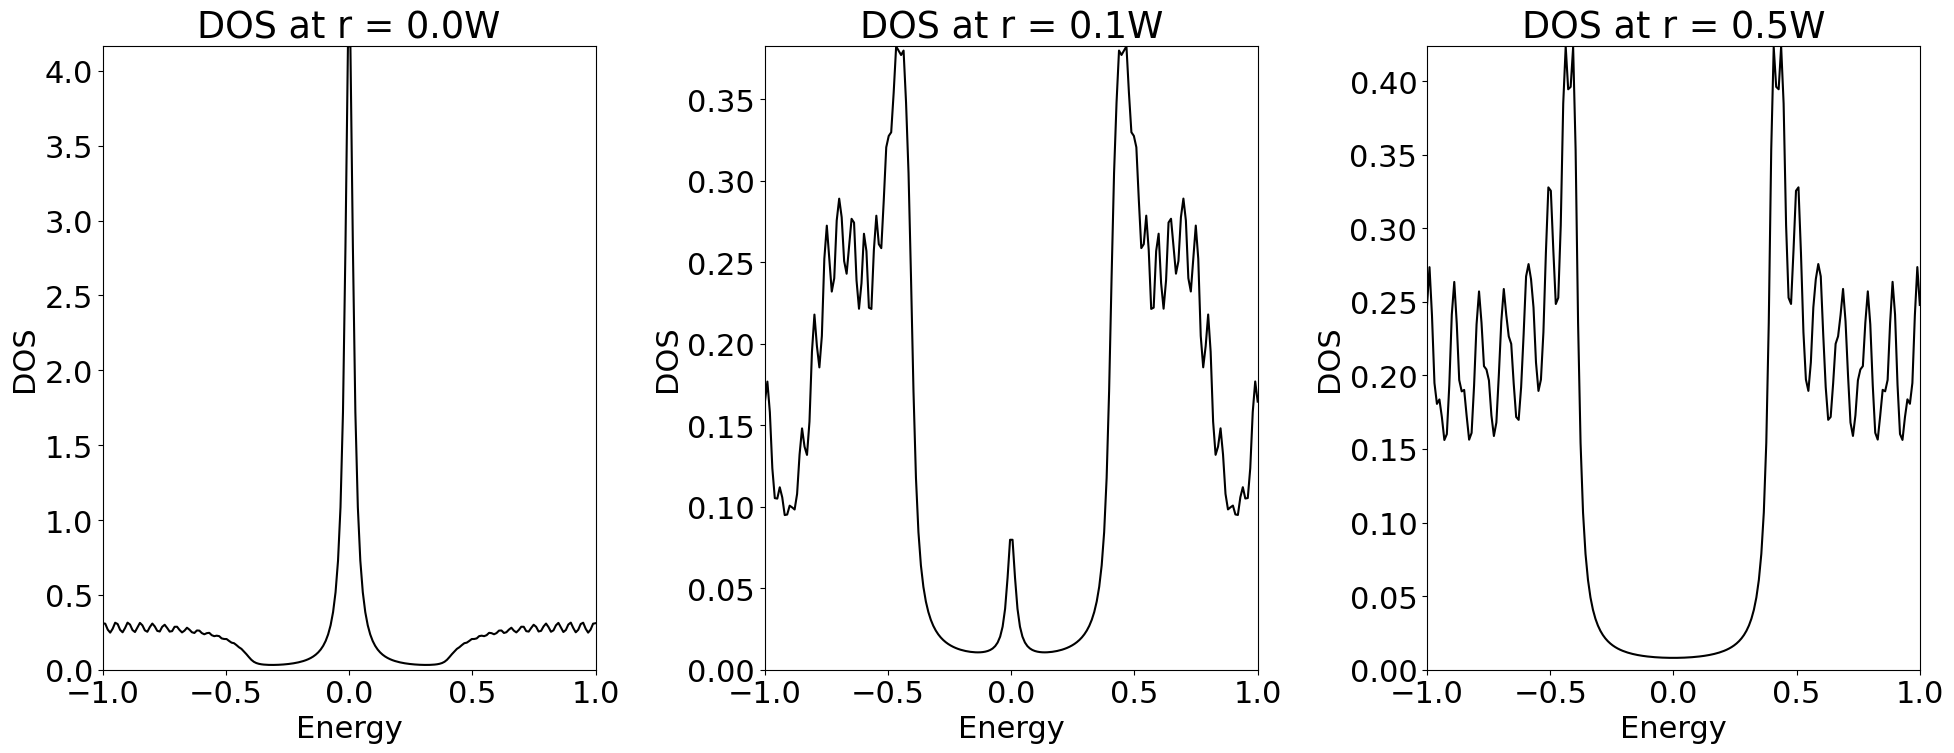

In [11]:
from pyqula import geometry

def get_kitaev_model(g): # transform a geometry into the Kitaev model
    h = g.get_hamiltonian() # generate a Hamiltonian
    h.add_onsite(4.0) ; h.add_exchange([0.,0.,4.]) # spinless electron gas
    delta = 0.2 # strength of the superconducting order
    h.add_pairing(mode="pwave",delta=delta,d=[1.,0.,0.]) # add p-wave SC order
    return h

# generate the finite system
L = 100 # length of the finite system
bg = geometry.chain() # bulk geometry
gf = gb.get_supercell(L) ; gf.dimensionality = 0 # make a finite system
h = get_kitaev_model(gf) # generate kitaev model

inds = [0,L//10,L//2]

energies= np.linspace(-1.,1.,200)
ii = 0
for ind in inds: # loop over indexes
    plt.subplot(1,len(inds),ii+1) ; ii += 1 
    P = h.get_operator("site",index=ind)*h.get_operator("electron") # electron part of the spectral function
    (es,ds) = h.get_dos(operator=P,energies=energies,delta=2e-2)
    plt.plot(es,ds,c="black") ; plt.ylim([0,max(ds)])
    plt.title("DOS at r = "+str(round(ind/L,2))+"W")
    plt.xlabel("Energy") ; plt.ylabel("DOS") ; plt.xlim([min(es),max(es)])
plt.tight_layout()

### Quiz
- Decrease the length L of the finite chain, what happens to the spectra and why?

## (Exercise): Emergence of Majorana modes as a function of the size of the superconductor
We will now see how the emergence of Majorana zero modes is associated to the length of the topological superconductor

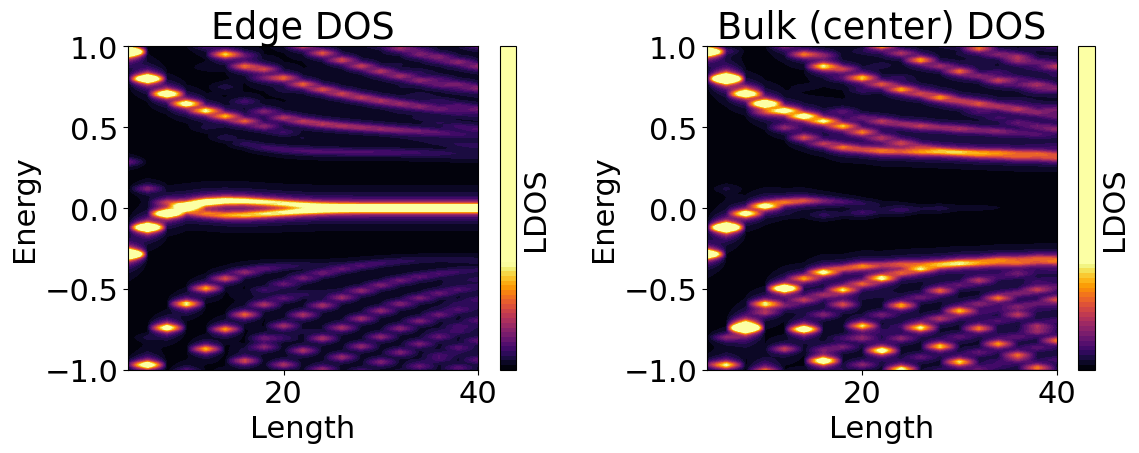

In [12]:
from pyqula import geometry

def get_kitaev_model(L=4,mu=.0,Delta=0.2): # transform a geometry into the Kitaev model
    g = geometry.chain() # bulk geometry
    g = g.get_supercell(L) ; g.dimensionality = 0 # make a finite system
    h = g.get_hamiltonian() # generate a Hamiltonian
    h.add_onsite(4.0) ; h.add_exchange([0.,0.,4.]) # spinless electron gas
    h.add_onsite(mu) # chemical potential
    h.add_pairing(mode="pwave",delta=Delta,d=[1.,1.,0.]) # add p-wave SC order
    return h

# generate the finite system
L = 100 # length of the finite system



inds = [0,L//10,L//2]

energies= np.linspace(-1.,1.,200)
Ls = range(4,42,2)
dedge,dbulk = [],[] # edge and bulk DOS
for L in Ls: # loop over lengths
    Delta = 0.1 # strength of superconducting order
    mu = 0.3 # chemical potential
    h = get_kitaev_model(L=L,Delta=Delta,mu=mu) # generate kitaev model
    Pedge = h.get_operator("site",index=0)*h.get_operator("electron") # electron part of the spectral function
    Pbulk = h.get_operator("site",index=L//2)*h.get_operator("electron") # electron part of the spectral function
    dedge.append(h.get_dos(operator=Pedge,energies=energies,delta=2e-2)[1]) # edge DOS
    dbulk.append(h.get_dos(operator=Pbulk,energies=energies,delta=2e-2)[1]) # bulk DOS
dedge = np.array(dedge).T # as array
dbulk = np.array(dbulk).T # as array

fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1) ; plt.title("Edge DOS")
plt.contourf(Ls,energies,dedge,levels=80,cmap="inferno",vmin=0.,vmax=np.max(dedge)/3.)
plt.xlabel("Length") ; plt.ylabel("Energy")
plt.colorbar(ticks=[],label="LDOS")


plt.subplot(1,2,2) ; plt.title("Bulk (center) DOS")
plt.contourf(Ls,energies,dbulk,levels=80,cmap="inferno",vmin=0.,vmax=np.max(dbulk)/3.)
plt.colorbar(ticks=[],label="LDOS")
plt.xlabel("Length") ; plt.ylabel("Energy")

plt.tight_layout()

### Quiz
- Why do the zero modes appear in the edge as the system gets bigger?
- Why do the zero modes disappear from the bulk as the system gets bigger?
- Increase the value of topological superconducting gap Delta, what happens and why?
- Decrease the value of topological superconducting gap Delta, what happens and why?
- Change the chemical potential mu, what happens and why?

## (Exercise): Interaction-induced spin-triplet superconductivity
We will now see that even in systems breaking time-reversal symmetry, superconductivity can emerge

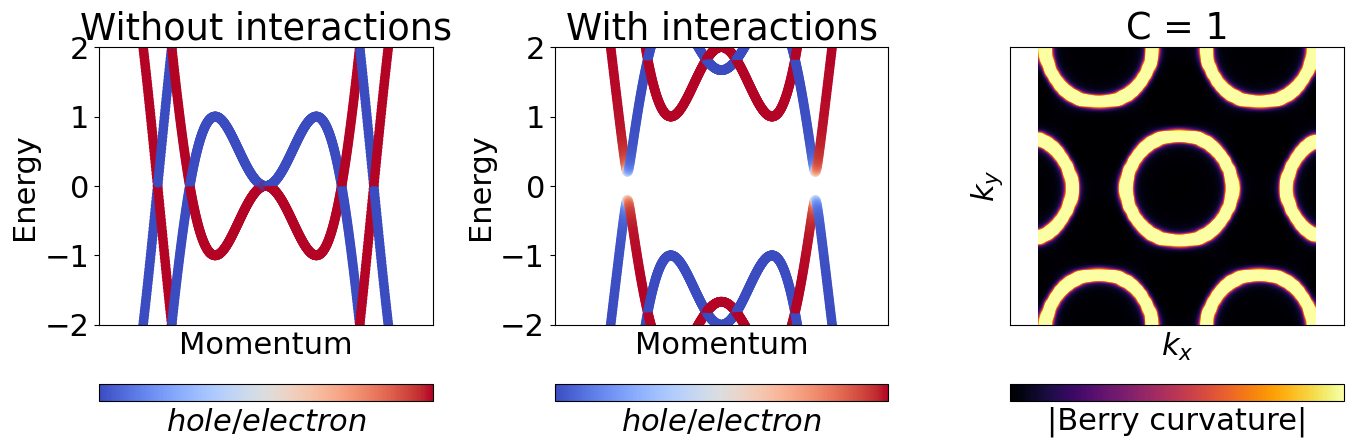

In [13]:
from pyqula import geometry
# now, let us include attractive interactions at the mean-field level
g = geometry.triangular_lattice() # generate a triangular lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_exchange([0.,0.,-2.]) # break time-reversal symmetry with an exchange field
h.setup_nambu_spinor() # setup the nambu spinor

def plot_case(hscf):
    (k,e,c) = hscf.get_bands(operator="electron",nk=800) # compute band structure
    plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-2,2]) ; plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")

fig = plt.figure(figsize=(14,5))
  

# first, let us see how the band structure looks like without interactions
plt.subplot(1,3,1) ; plt.title("Without interactions")
plot_case(h)

# now, let us see how the band structure looks like with interactions
hscf = h.get_mean_field_hamiltonian(V1=-1.,filling=0.3,mix=0.3,mf="random")
plt.subplot(1,3,2) ; plt.title("With interactions")
plot_case(hscf)

plt.subplot(1,3,3) ; plt.title("Chern number")
nk = 60 # number of kpoints
c = hscf.get_chern(nk=nk) # compute Chern number
# now let us compute the Berry curvature in 2D
(kx,ky,omega) = hscf.get_berry_curvature(nk=nk) # compute Berry curvature
plt.title("C = "+str(int(round(c))))
omega2d = np.array(omega).reshape((nk,nk)) # reshape as a 2d array
plt.imshow(np.abs(omega2d),interpolation="bicubic",cmap="inferno",vmax=10,vmin=0.) # plot
plt.axis("equal") ; plt.colorbar(label="|Berry curvature|",orientation="horizontal",ticks=[])
plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("$k_x$") ; plt.ylabel("$k_y$")

plt.tight_layout()

#### In the lab
- Spin triplet superconductivity has been observed in twisted graphene trilayers under an external magnetic field
https://www.nature.com/articles/s41586-021-03685-y

### Quiz
- How do we know that this is spin-triplet superconductivity?
- Remove the exchange field. Can you get spin singlet superconductivity? Explain why
- Which of the two orders is topologically non-trivial?

## (Exercise): Topological modes in interaction-driven spin triplet superconductors
Let us now see that the interaction-induced topological superconductor above has topological modes

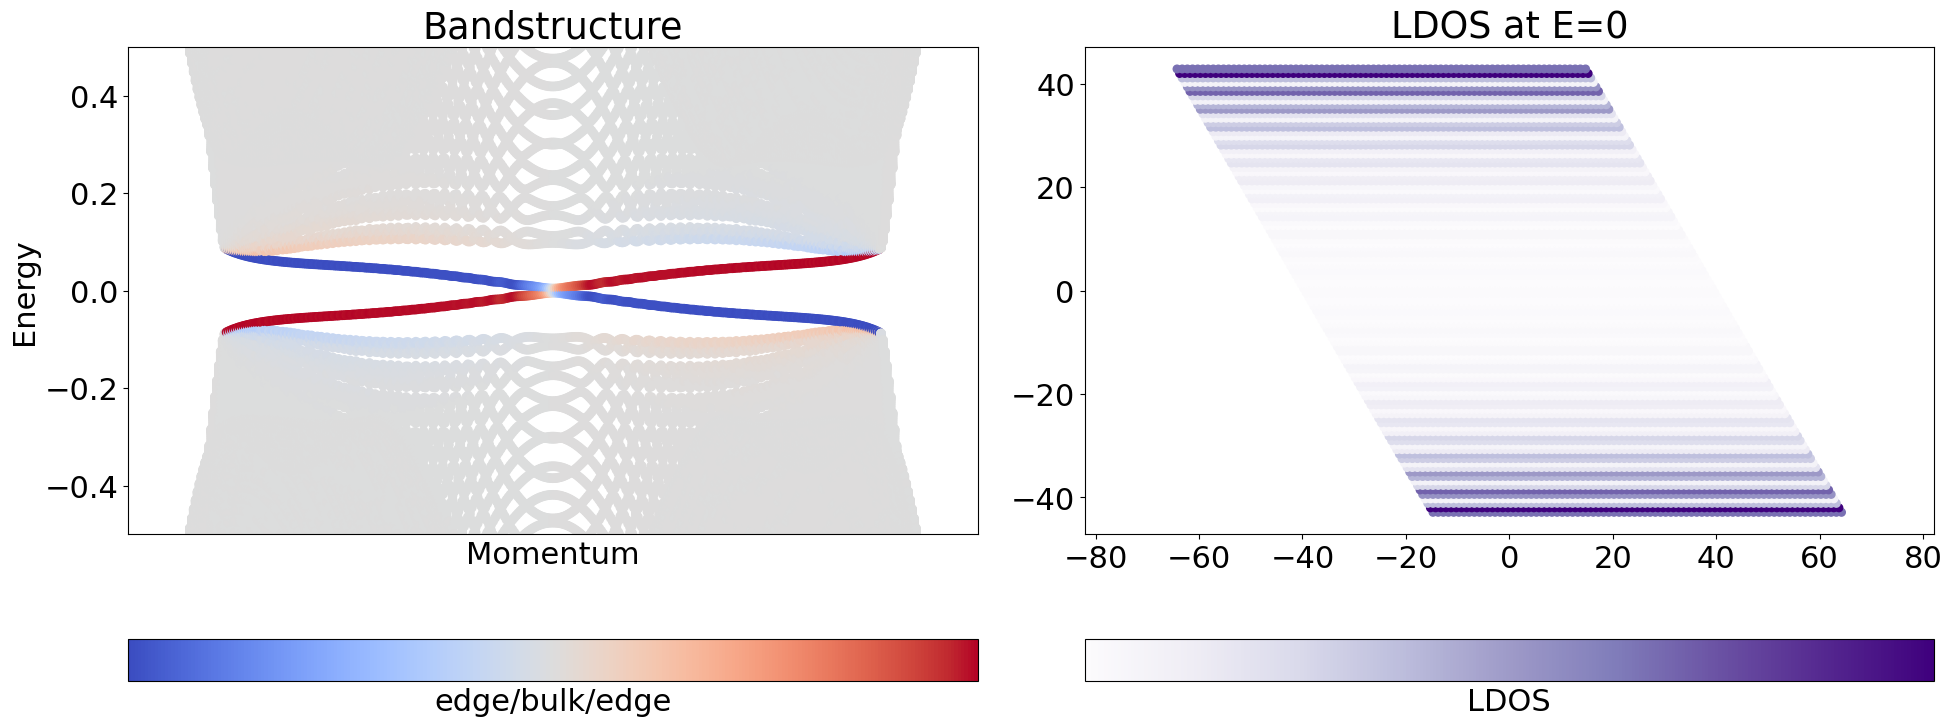

In [14]:
from pyqula import geometry, ribbon

g = geometry.triangular_lattice() # generate a triangular lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_exchange([0.,0.,1.]) # break time-reversal symmetry with an exchange field
h.setup_nambu_spinor() # setup the nambu spinor
h = h.get_mean_field_hamiltonian(V1=-1.,filling=0.3,mix=0.5,mf="random")

# now plot electronic structure in a ribbon
plt.subplot(1,2,1) ; plt.title("Bandstructure") # first the bands
hr = ribbon.bulk2ribbon(h,n=100) # create a ribbon from a bulk Hamiltonian
(k,e,c) = hr.get_bands(operator="yposition",kpath=["X","G","X"]) # plot the bands highlighting the position
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-.5,.5])
plt.colorbar(label="edge/bulk/edge",ticks=[],orientation="horizontal")

plt.subplot(1,2,2) ; plt.title("LDOS at E=0") # now the LDOS
(x,y,d) = hr.get_ldos(energy=0.0,nrep=80,delta=1e-2,nk=50) # compute the local density of states
plt.scatter(x,y,c=d,s=30,cmap="Purples") ; plt.axis("equal") 
plt.colorbar(label="LDOS",ticks=[],orientation="horizontal")

plt.tight_layout() # adjust subplots

### Quiz
- Remove the external exchange field. What happens to the electronic structure of the ribbon?
- Put the exchange field in a different direction. What happens to the electronic structure and why?

## (Exercise): Trivial and topological superconducting order parameters, bulk spectra
Let us now see that a gapped topological state can be trivial or topological.

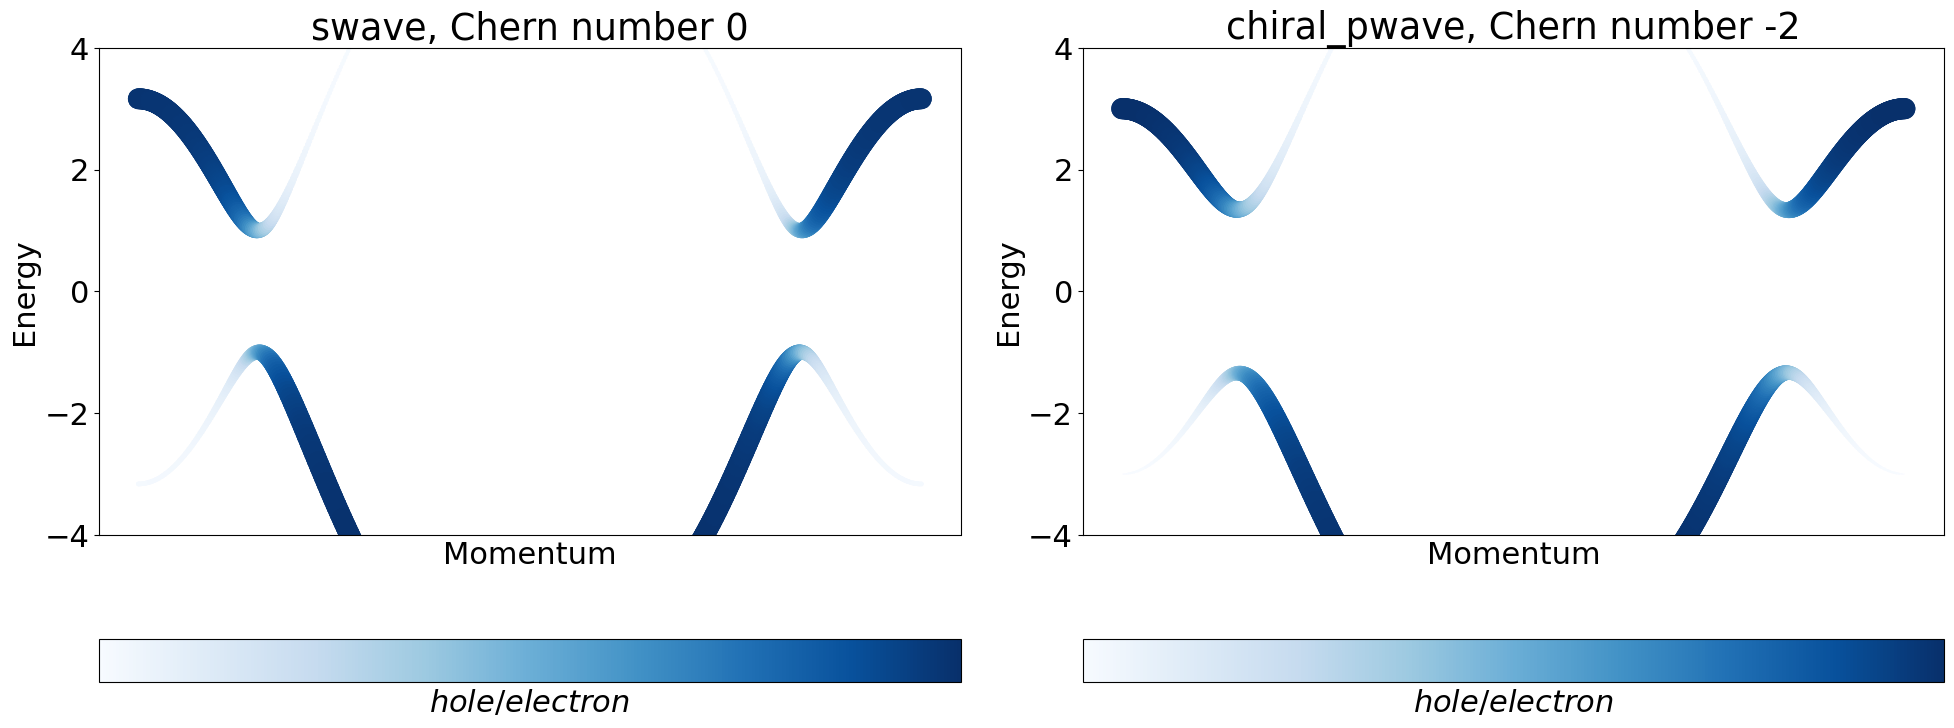

In [15]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a triangular lattice

def plot_case(name,delta): 
    h = g.get_hamiltonian() ; h.add_onsite(-3.0) # generate Hamiltonian
    h.add_pairing(mode=name,delta=delta) # add pairing
    (k,e,c) = h.get_bands(operator="electron",kpath=["G","K","M","G"]) # compute bands
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") 
    plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-4,4]) # plot
    plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")
    c = h.get_chern()
    plt.title(name+", Chern number "+str(int(c)))

# first s-wave
plt.subplot(1,2,1) 
plot_case("swave",1.0)

# now chiral pwave
plt.subplot(1,2,2) 
plot_case("chiral_pwave",0.4)
    
plt.tight_layout()

### Quiz
- Add both swave and pwave superconducting order, what happens to the electronic band structure?
- Change the chemical potential. How does the chiral pwave superconducting order change? Explain why

## (Exercise): Trivial and topological superconducting order parameters, edge spectra
Let us now see that a gapped topological state can be trivial or topological, leading the presence or absence of edge states

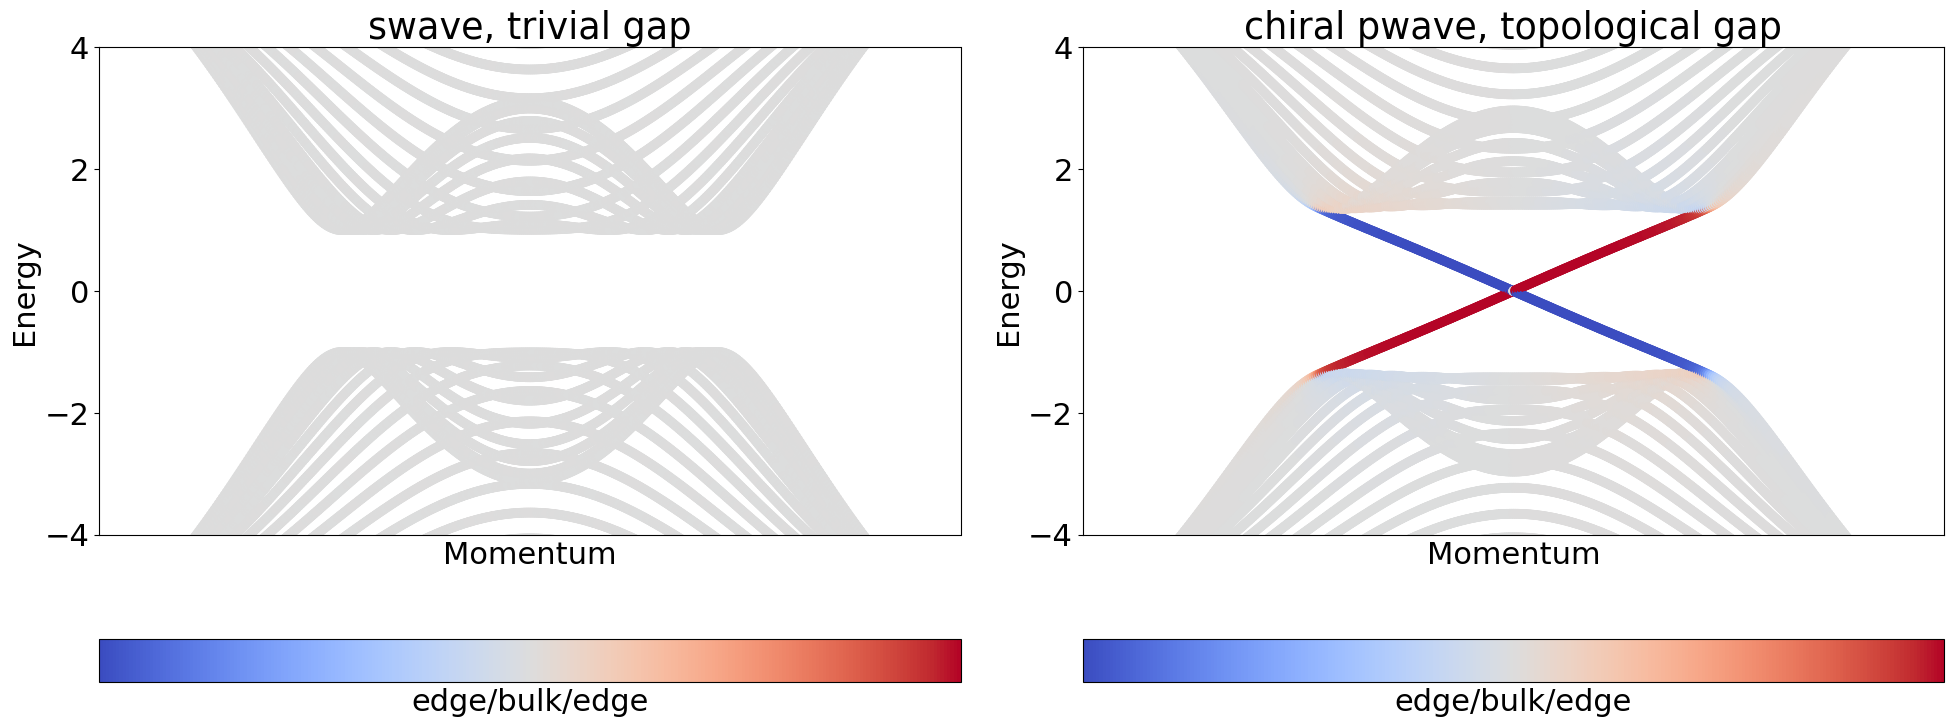

In [16]:
from pyqula import geometry, ribbon
g = geometry.triangular_lattice() # generate a triangular lattice
g = ribbon.bulk2ribbon(g,n=20) # create a ribbon from a bulk Hamiltonian

def plot_case(name,delta): 
    h = g.get_hamiltonian() ; h.add_onsite(-3.0) # generate Hamiltonian
    h.add_pairing(mode=name,delta=delta) # add pairing
    (k,e,c) = h.get_bands(operator="yposition",kpath=["X","G","X"]) # plot the bands highlighting the position
    plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-4,4])
    plt.colorbar(label="edge/bulk/edge",ticks=[],orientation="horizontal")

# first s-wave
plt.subplot(1,2,1) ; plt.title("swave, trivial gap")
plot_case("swave",1.0)

# now chiral pwave
plt.subplot(1,2,2) ; plt.title("chiral pwave, topological gap")
plot_case("chiral_pwave",0.4)
    
plt.tight_layout()

### Quiz
- Include both swave and chiral pwave orders. What happens to the electronic structure?
- Change the chemical potential. How does the electronic structure change?

## (Exercise): Gapped and nodal superconducting orders
Let us now discuss different superconducting orders in the triangular lattice, in particular focusing on gaped s-wave order and nodal f-wave order

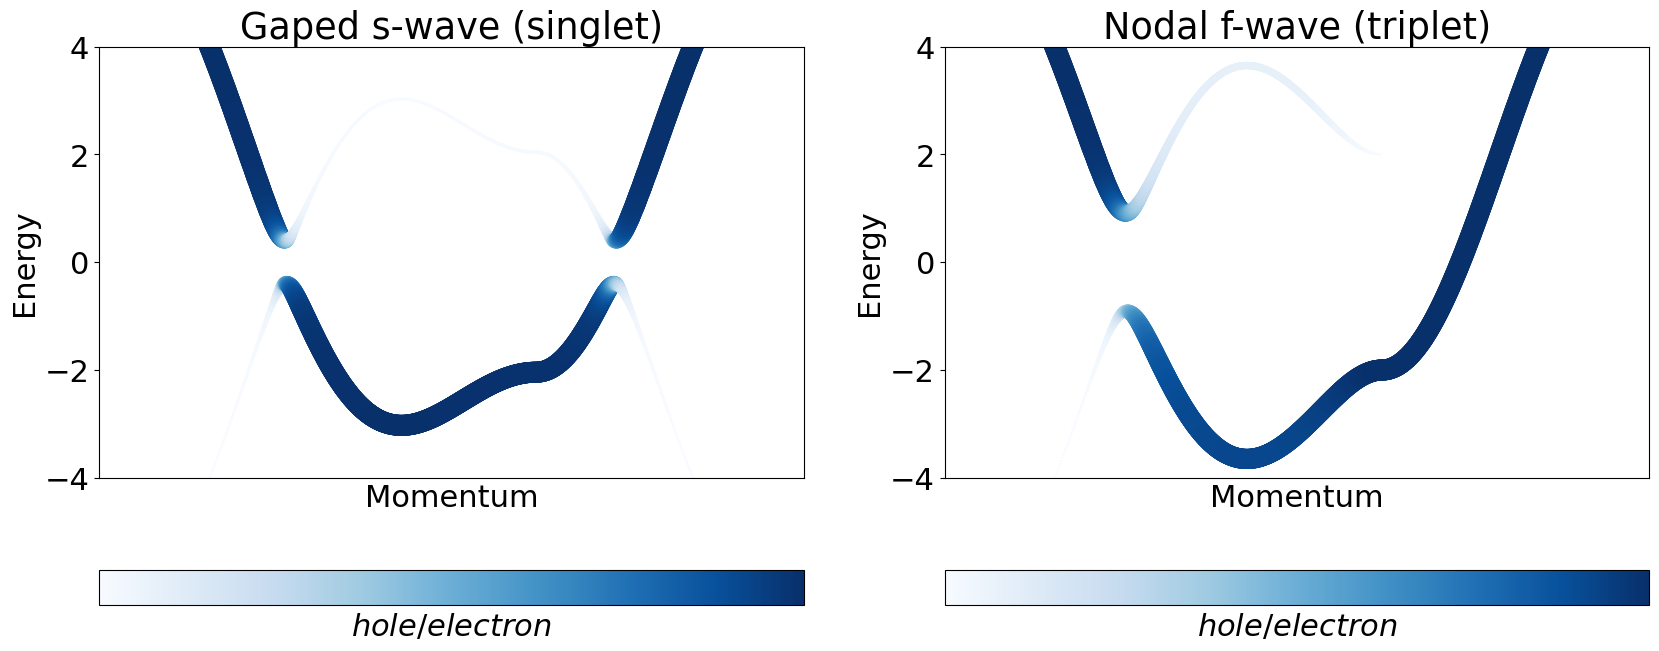

In [17]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a triangular lattice

# first s-wave
plt.subplot(1,2,1) ;  plt.title("Gaped s-wave (singlet)")
h = g.get_hamiltonian() # generate Hamiltonian
h.add_pairing(mode="swave",delta=0.4) # add swave pairing
(k,e,c) = h.get_bands(operator="electron",kpath=["G","K","M","G"]) # compute bands
plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") 
plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-4,4]) # plot
plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")

# now nodal f-wave
plt.subplot(1,2,2) ;  plt.title("Nodal f-wave (triplet)")
h = g.get_hamiltonian() # generate Hamiltonian
h.add_pairing(mode="nodal_fwave",delta=0.2) # add swave pairing
(k,e,c) = h.get_bands(operator="electron",kpath=["G","K","M","G"]) # compute bands
plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") 
plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-4,4]) # plot
plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")


### Quiz
- Discuss why an f-wave order is a triplet superconducting order parameter
- Discuss in which points of the Brillouin zone the triplet order (odd order parameter) must have nodes

#### In the lab
- Nodal superconductivity has been observed in twisted graphene trilayers 
https://www.nature.com/articles/s41586-022-04715-z

## (Exercise): s-wave superconductivity in the presence of spin-orbit coupling
Here we look at the impact of Rashba spin-orbit coupling, and its interplay with s-wave superconductivity. Due to Kramer's theorem, a finite Rashba spin-orbit coupling is not detrimental for an s-wave superconducting state

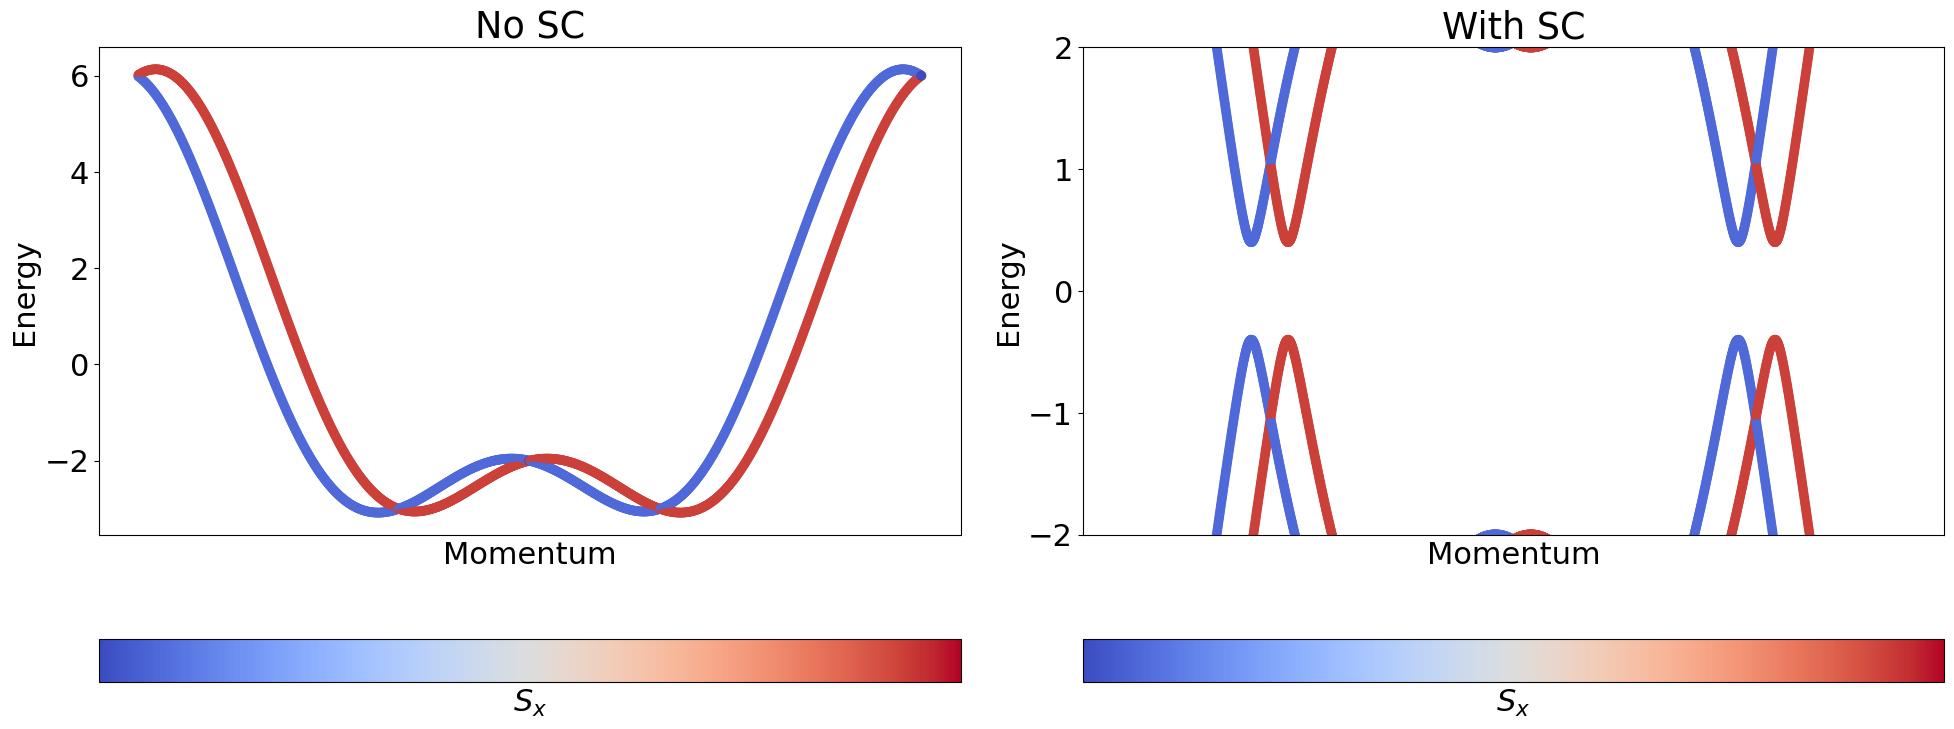

In [18]:
# first compute the bands without superconductivity
from pyqula import geometry 
g = geometry.triangular_lattice()
h = g.get_hamiltonian() # generate Hamiltonian

plt.subplot(1,2,1) ; plt.title("No SC")
h.add_rashba(0.3) # add Rashba SOC
(k,e,c) = h.get_bands(operator="sx",nk=800) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([])
plt.colorbar(label="$S_x$",ticks=[],orientation="horizontal")

plt.subplot(1,2,2) ; plt.title("With SC")
h.add_swave(0.4)
(k,e,c) = h.get_bands(operator="sx",nk=2000) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2,2]) # plot
plt.colorbar(label="$S_x$",ticks=[],orientation="horizontal")

plt.tight_layout()

### Exercise
- Change the value of the SOC, does the superconducting gap change?
- Discuss why the SOC does not impact superconductivity phenomenology above happens.

## (Exercise): s-wave superconductivity in the presence of magnetism
Let us now see how the presence of magnetism impacts an s-wave superconducting state

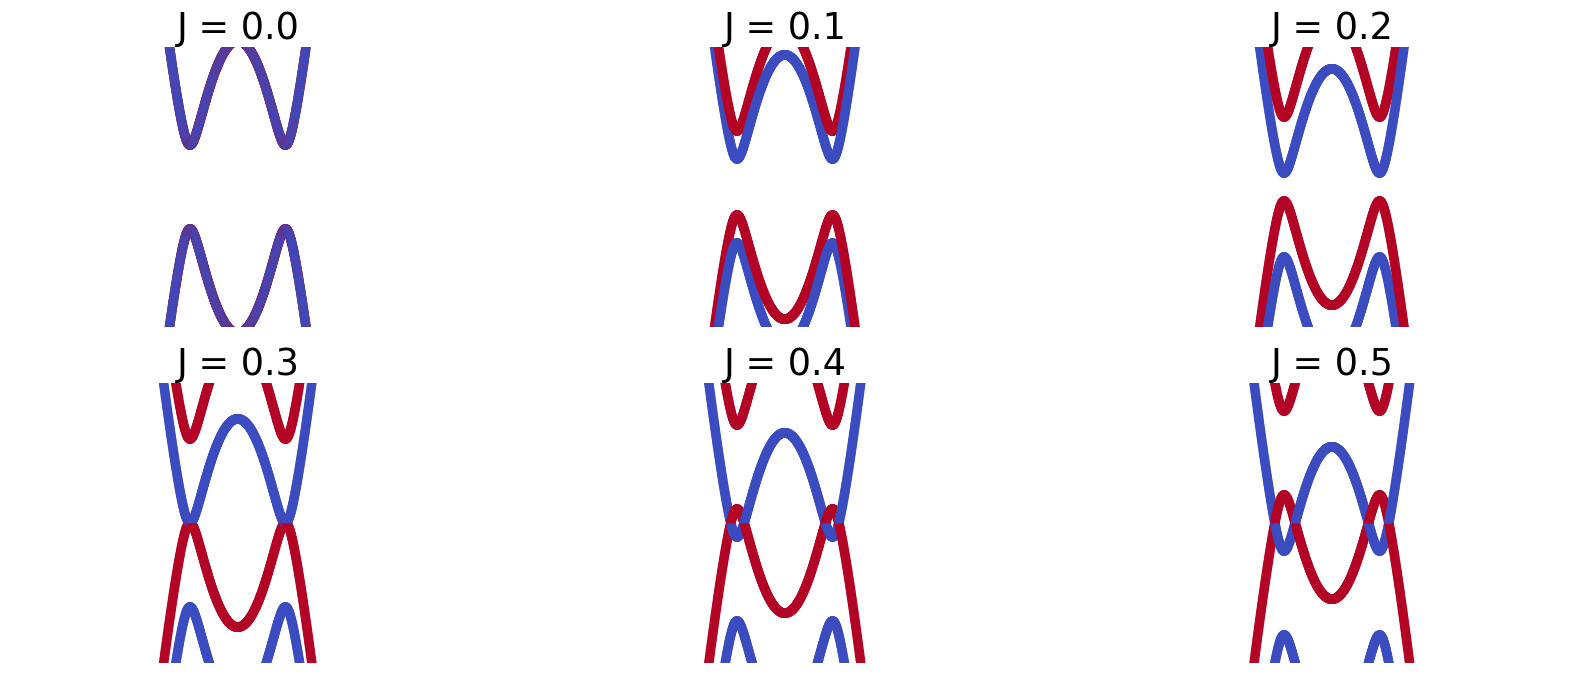

In [19]:
# plot the bands for different exchance couplings
from pyqula import geometry
Js = np.linspace(0.,0.5,6) # exchange couplings
ij = 0 # counter
for J in Js: # loop over exchange couplings
    g = geometry.square_lattice() # get the geometry
    h = g.get_hamiltonian() # get the Hamiltonian
    h.add_onsite(3.) # shift chemical potential
    h.add_zeeman([0.,0.,J]) # add exchange field
    h.add_swave(0.3) # add swave SC
    (k,e,c) = h.get_bands(nk=1000,operator="sz") # compute the bands
    plt.subplot(len(Js)//3,3,ij+1) ; ij +=1 
    plt.scatter(k,e,c=c) ; plt.axis("off") ; plt.ylim([-1.,1.]) ; plt.title("J = "+str(round(J,2))) # plot

### Quiz
- Change the value of the superconducting term. At which value of the exchange do you see the gap closing?
- Discuss why a magnetic exchange field closes the gap 

## (Exercise): Magnetic disorder in an s-wave superconductor
Let us now add random magnetic disorder to a superconductor, and see how that impact the superconducting gap

(-2.0, 2.0)

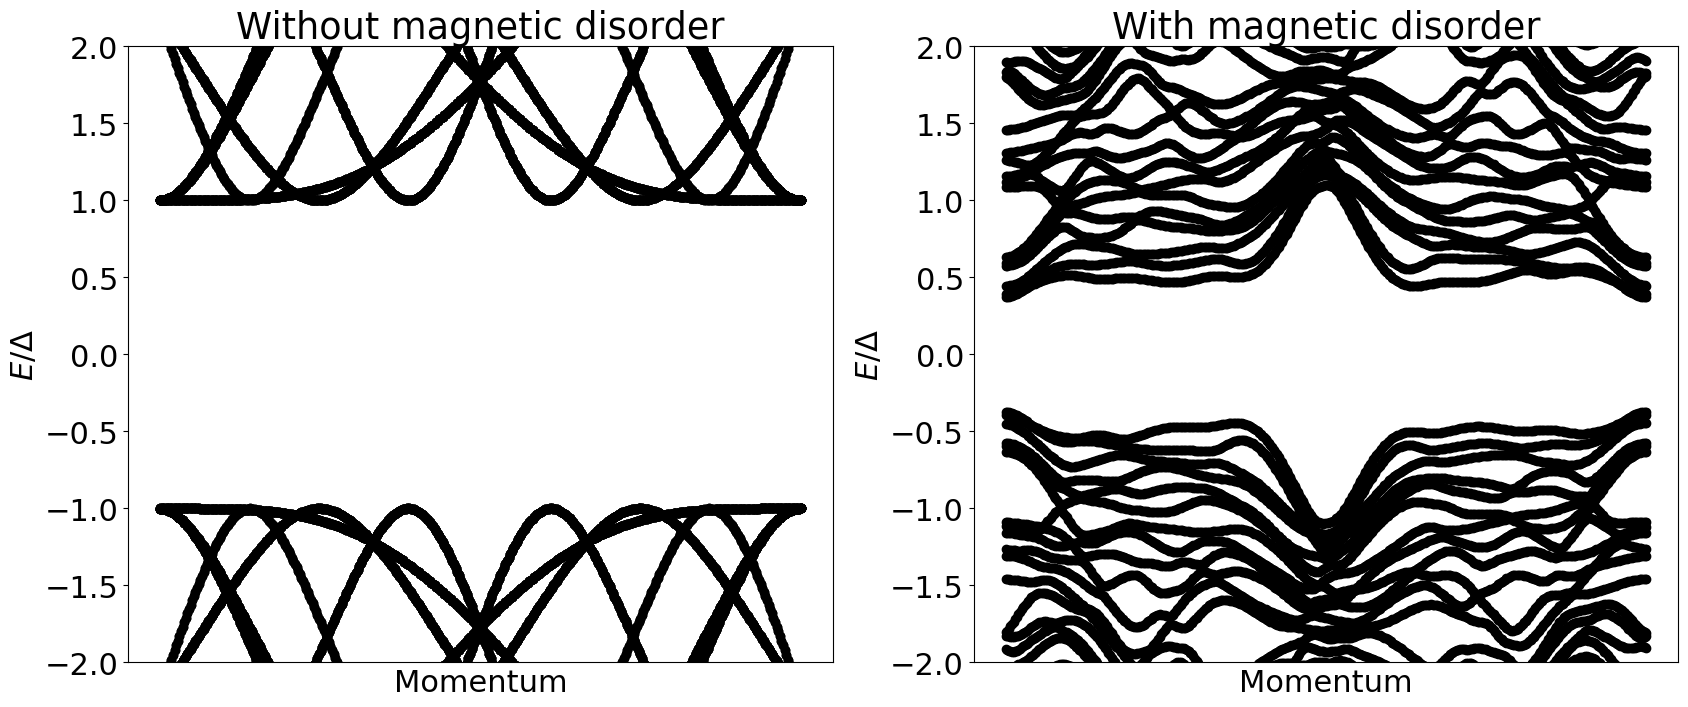

In [20]:
from pyqula import geometry, potentials
g = geometry.triangular_lattice() # take a triangular lattice
g = g.get_supercell((6,6)) # make a supercell so that we have many sites per unit cell
h = g.get_hamiltonian() # generate Hamiltonian

delta = 0.5 # superconducting order parameter
h.add_swave(delta) # add superconductivity

# first without magnetic disorder
plt.subplot(1,2,1) ; plt.title("Without magnetic disorder")
(k,e) = h.get_bands() # compute bands
plt.scatter(k,e/delta,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("$E/\Delta$") 
plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

# now with the magnetic disorder
plt.subplot(1,2,2) ; plt.title("With magnetic disorder")
fimp = potentials.impurity(g.r[0],v=[0.,0.,2.]) # magnetic impurity
h.add_exchange(lambda r: 2*delta*(np.random.random(3)-0.5)) # add local magnetic disorder
#h.add_onsite(lambda r: 2*delta*(np.random.random()-0.5)) # add local disorder
(k,e) = h.get_bands() # compute bands
plt.scatter(k,e/delta,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("$E/\Delta$") 
plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

### Quiz
- Change the strength of the magnetic disorder. How does the in-gap band change?
- Replace the magnetic disorder by non-magnetic disorder (add_onsite). Discuss why the result is different from the magnetic disorder

## (Exercise): Artificial topological superconductivity
We will create an artificial topological superconductor by combining s-wave superconductivity, exchange field and Rashba spin-orbit coupling. For the sake of concreteness we will use a triangular lattice with first neighbor hopping.

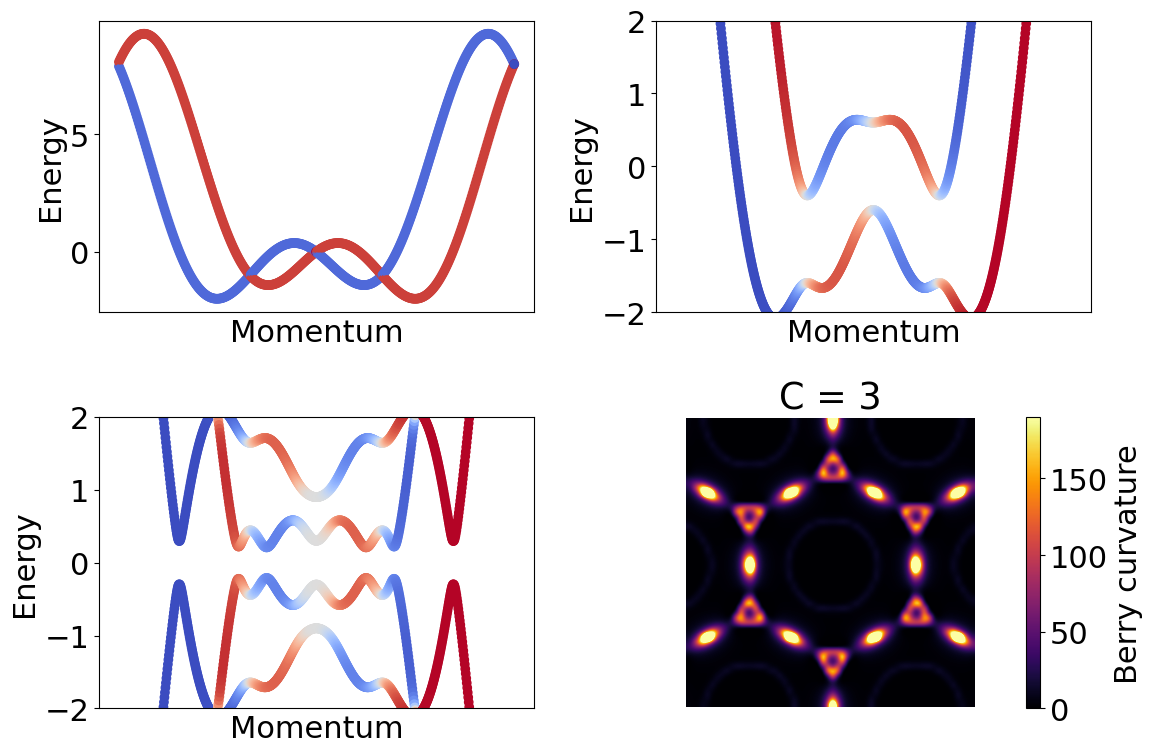

In [21]:
# Now we add Rashba spin-orbit coupling, to create a spin-momentum locking in the electronic structure
from pyqula import geometry
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_rashba(1.0) # Rashba spin-orbit coupling
h.add_onsite(2.0) # alternative chemical potential

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
(k,e,c) = h.get_bands(operator="sx") # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

plt.subplot(2,2,2)
h.add_zeeman([0.,0.,-0.6]) # Zeeman field
(k,e,c) = h.get_bands(operator="sx",nk=800) # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

plt.subplot(2,2,3)
h.add_swave(.3) # add superconductivity
(k,e,c) = h.get_bands(operator="sx",nk=800) # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2.,2.]) # plot
#plt.colorbar(label="Berry curvature",ticks=[])

plt.subplot(2,2,4)
nk = 60 # number of kpoints
c = h.get_chern(nk=nk) # compute Chern number
# now let us compute the Berry curvature in 2D
(kx,ky,omega) = h.get_berry_curvature(nk=nk) # compute Berry curvature
plt.title("C = "+str(int(round(c))))
omega2d = np.array(omega).reshape((nk,nk)) # reshape as a 2d array
plt.imshow(omega2d,interpolation="bicubic",cmap="inferno",vmax=np.max(omega)/4.,vmin=0.) # plot
plt.axis("equal") ; plt.colorbar(label="Berry curvature") ; plt.axis("off") 

plt.tight_layout()

### Quiz
- Decrease value of the Rashba SOC. Does the splitting in momentum space become bigger or smaller?
- Discuss why an out-of plane field opens a gap in some of the previous crossings of the band structure
- Decrease value of the exchange field. Do the anticrossings become bigger or smaller?
- Discuss what can be the consequence of having a Chern number
- If you change the chemical potential, do you still get a finite Chern number? Discuss why

## (Exercise): Edge states of an artificial topological superconductor
Here, taking as starting point the Hamiltonian of a topological superconductor above, we will show how topological edge states appear in finite systems

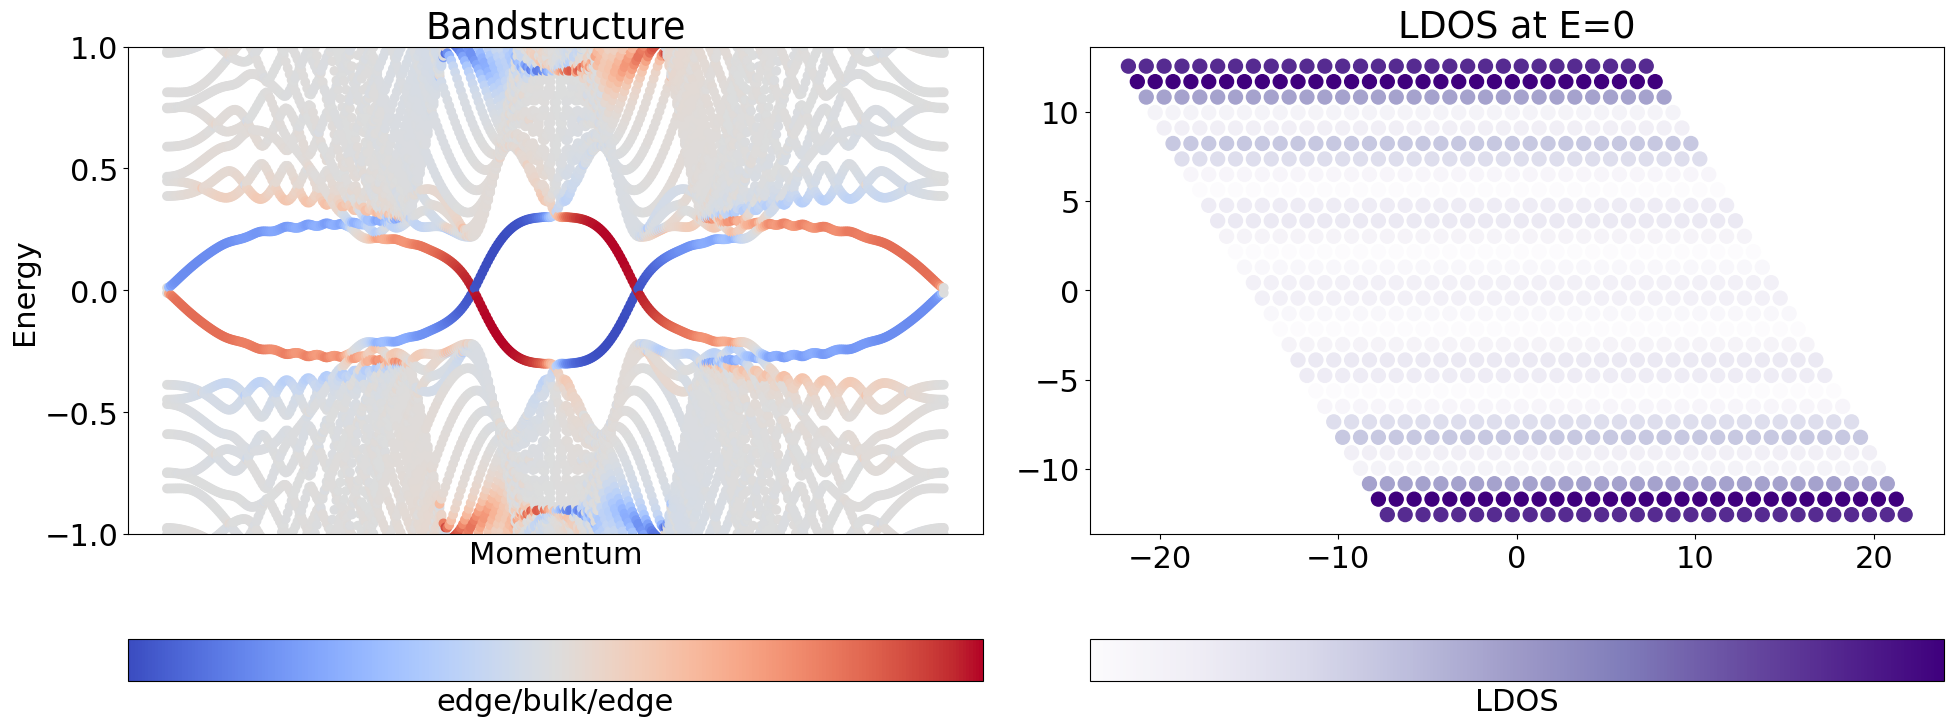

In [22]:
from pyqula import ribbon,geometry
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_rashba(1.0) # Rashba spin-orbit coupling
h.add_onsite(2.0) # shift chemical potential
h.add_zeeman([0.,0.,0.6]) # Zeeman field
h.add_swave(.3) # add superconductivity

plt.subplot(1,2,1) ; plt.title("Bandstructure") # first the bands
hr = ribbon.bulk2ribbon(h,n=30) # create a ribbon from a bulk Hamiltonian
(k,e,c) = hr.get_bands(operator="yposition") # plot the bands highlighting the position
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])
plt.colorbar(label="edge/bulk/edge",ticks=[],orientation="horizontal")

plt.subplot(1,2,2) ; plt.title("LDOS at E=0") # now the LDOS
(x,y,d) = hr.get_ldos(energy=0.0,nrep=30,delta=1e-2,nk=50) # compute the local density of states
plt.scatter(x,y,c=d,s=100,cmap="Purples") ; plt.axis("equal") 
plt.colorbar(label="LDOS",ticks=[],orientation="horizontal")

plt.tight_layout() # adjust subplots

### Quiz
- The localization of the edge modes depends on the topological gap. Show that for parameters yielding a small topological gap, the edge states are more delocalized
- Show that if the ribbon is not wide enough, the edge states hybridize and lead to a gap opening

#### In the lab
- Topological superconductivity has been observed in artificial NbSe2/CrBr3 heterostructures
https://www.nature.com/articles/s41586-020-2989-y

## (Exercise): Topological phase transition with the exchange field
Above we saw that superconductivity can coexist with spin-orbit coupling. Since the superconductor at zero exchange field is trivial, a topological phase transition must occur as the exchange field is turned on. Here we will show how such a phase transition takes place

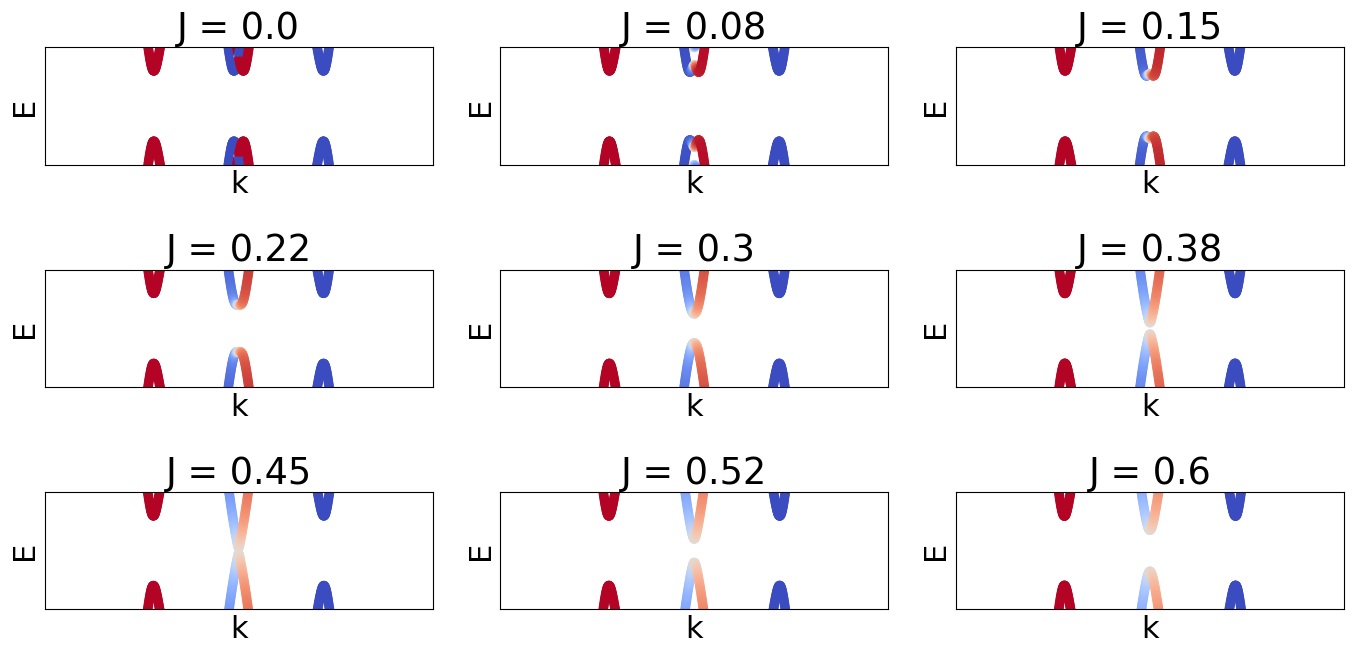

In [23]:
# plot the bands for different exchance couplings
from pyqula import geometry
Js = np.linspace(0.,0.6,9) # exchange couplings
fig = plt.figure(figsize=(14,7))
ij = 0 # counter
for J in Js: # loop over exchange couplings
    g = geometry.triangular_lattice() # get the geometry
    h = g.get_hamiltonian() # get the Hamiltonian
    h.add_onsite(-5.7) # shift chemical potential
    h.add_rashba(1.0) # add Rashba SOC
    h.add_zeeman([0.,0.,J]) # add exchange field
    h.add_swave(0.3) # add swave SC
    (k,e,c) = h.get_bands(nk=1000,operator="sx",kpath=["M1","G","M1"]) # compute the bands
    plt.subplot(len(Js)//3,3,ij+1) ; ij +=1 
    plt.scatter(k,e,c=c) ; plt.ylim([-0.5,0.5]) ; plt.title("J = "+str(round(J,2))) # plot
    plt.xticks([]) ; plt.yticks([]) ; plt.xlabel("k") ; plt.ylabel("E")

plt.tight_layout() # adjust subplots

### Quiz
- At which magnetic field does the topological phase transition happen?
- Replace the out of plane field by an in-plane one. Can you get a topological phase?